**Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios).**

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_enem = pd.read_json('enem_2023.json')

In [9]:
df_enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [10]:
df_enem.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [131]:
df_describe = df_enem.describe()

In [133]:
df_describe

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [59]:
df_enem.columns

Index(['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação', 'Sexo'],
      dtype='object')

1. Qual das disciplinas tem a maior amplitude de nota?

In [134]:
for i in df_describe:
  df_amplitude = df_describe.loc['max'] - df_describe.loc['min']

In [137]:
df_amplitude = df_amplitude.rename('Amplitude')
df_amplitude[df_amplitude == df_amplitude.max()]

,Amplitude
Redação,729.160035


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [60]:
df_enem.iloc[:,0:5].mean()

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [58]:
df_enem.iloc[:,0:5].median()

,0
Linguagens,515.045250
Ciências humanas,524.519920
Ciências da natureza,500.479263
Matemática,533.247767
Redação,635.273973


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?


In [67]:
df_UFPE = df_enem.copy()

In [68]:
df_UFPE['Redação'] = df_enem.Redação.apply(lambda x: x*2)
df_UFPE['Matemática'] = df_enem.Matemática.apply(lambda x: x*4)
df_UFPE['Linguagens'] = df_enem.Linguagens.apply(lambda x: x*2)
df_UFPE['Ciências humanas'] = df_enem['Ciências humanas'].apply(lambda x: x*1)
df_UFPE['Ciências da natureza'] = df_enem['Ciências da natureza'].apply(lambda x: x*1)

In [69]:
df_UFPE.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,1171.338599,686.512178,390.482473,1809.125330,1092.743412,Homem
1,718.769216,642.084134,NaN,1648.820827,1483.650511,Mulher
2,1245.464768,495.510719,443.183580,2678.733603,1369.031501,Homem
3,700.329209,602.041588,413.979810,2706.435806,1342.474229,Homem
4,768.187315,489.249140,609.758123,2081.706791,1488.750095,Homem


In [77]:
df_UFPE_top500 = df_UFPE.sort_values(by=['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação'], ascending= False).head(500).dropna() #nessa caso, os nulos foram removidos, pois, logicamente se um aluno zerou alguma disciplina, ele perde a classificação

In [89]:
df_UFPE_top500.describe().loc['std']

,mean
Linguagens,1143.635078
Ciências humanas,531.180389
Ciências da natureza,500.650445
Matemática,2138.656841
Redação,1285.754328


In [87]:
df_UFPE_top500.describe().loc['mean']

,mean
Linguagens,1143.635078
Ciências humanas,531.180389
Ciências da natureza,500.650445
Matemática,2138.656841
Redação,1285.754328


4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?


In [99]:
df_UFPE_top40 = df_UFPE_top500.head(40)
df_top40_describe = df_UFPE_top40.describe()
df_top40_describe.loc["Variância"] = df_top40_describe.loc['std'] * df_top40_describe.loc['std']

In [107]:
df_top40_describe.loc['Variância']

,Variância
Linguagens,4372.563273
Ciências humanas,6425.714475
Ciências da natureza,7430.675678
Matemática,88951.071845
Redação,67837.904106


In [108]:
df_top40_describe.loc['mean']

,mean
Linguagens,1359.174806
Ciências humanas,548.956540
Ciências da natureza,515.845769
Matemática,2234.240648
Redação,1336.014175


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [140]:
df_describe[['Linguagens','Matemática']].loc['75%']

,75%
Linguagens,571.635876
Matemática,592.912963


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

(array([  2.,   1.,   5.,  14.,  24.,  38.,  60.,  84.,  92., 111., 100.,
         98.,  80.,  62.,  30.,  31.,  17.,   6.,   3.,   2.]),
 array([ 270.83996486,  307.29796662,  343.75596837,  380.21397013,
         416.67197189,  453.12997365,  489.5879754 ,  526.04597716,
         562.50397892,  598.96198067,  635.41998243,  671.87798419,
         708.33598594,  744.7939877 ,  781.25198946,  817.70999122,
         854.16799297,  890.62599473,  927.08399649,  963.54199824,
        1000.        ]),
 <BarContainer object of 20 artists>)

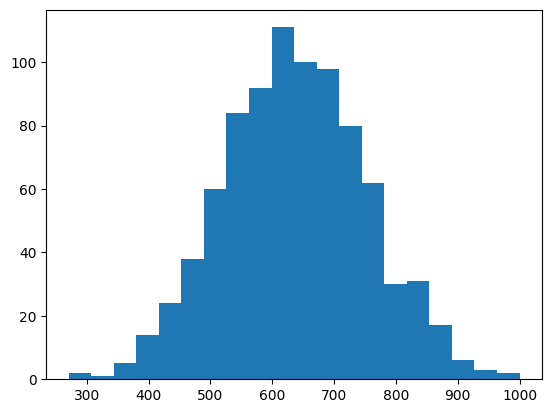

In [141]:
plt.hist(df_enem['Redação'].dropna(), bins = 20)
#O histograma de redação é simétrico

(array([  5.,  12.,  19.,  29.,  39.,  63., 102.,  99., 104., 109.,  91.,
         87.,  46.,  39.,  24.,  16.,   7.,   5.,   0.,   1.]),
 array([287.        , 312.87281586, 338.74563172, 364.61844758,
        390.49126344, 416.3640793 , 442.23689516, 468.10971102,
        493.98252688, 519.85534274, 545.7281586 , 571.60097446,
        597.47379032, 623.34660618, 649.21942203, 675.09223789,
        700.96505375, 726.83786961, 752.71068547, 778.58350133,
        804.45631719]),
 <BarContainer object of 20 artists>)

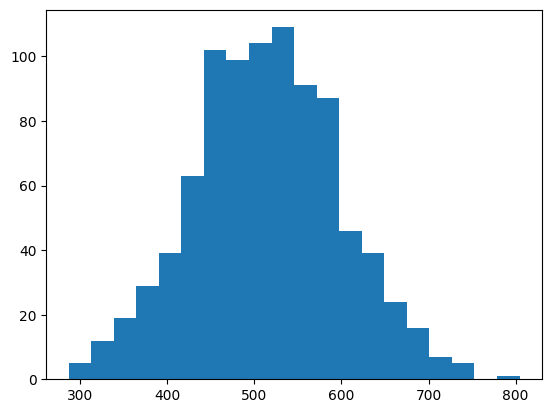

In [142]:
plt.hist(df_enem['Linguagens'].dropna(), bins = 20)
#O histograma de linguagens também é simétrico

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])


(array([  0.,   0.,   0.,   0.,   0.,   2.,   3.,   8.,  30.,  56., 101.,
        123., 144., 143., 108.,  73.,  33.,  25.,   9.,   2.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

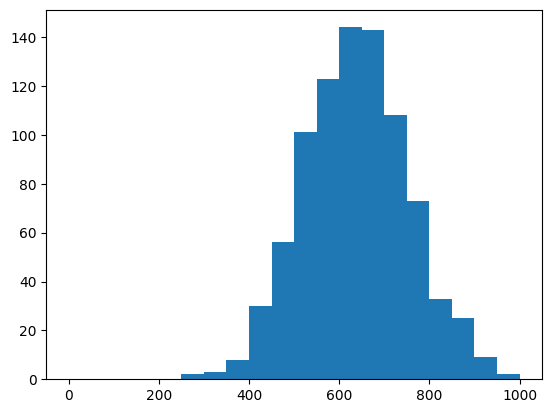

In [147]:
plt.hist(df_enem['Redação'].dropna(), bins = 20, range=[0,1000])
#O histograma de redação continua simétrico e ao que parece sem grandes mudanças no pico

(array([  0.,   0.,   0.,   0.,   0.,   2.,  20.,  55., 116., 198., 205.,
        167.,  81.,  40.,  11.,   1.,   1.,   0.,   0.,   0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

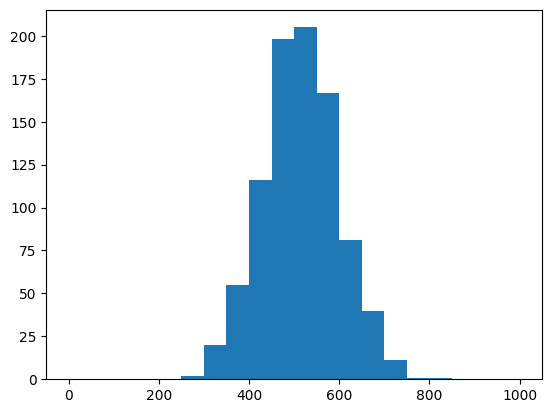

In [145]:
plt.hist(df_enem['Linguagens'].dropna(), bins = 20, range=[0,1000])
#O histograma de lingugens também continua simétrico

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.


<Axes: xlabel='Redação'>

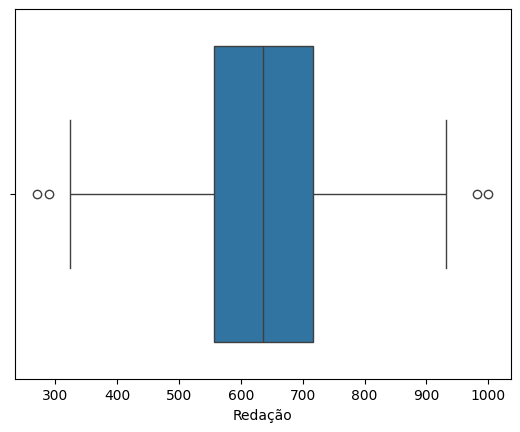

In [154]:
sns.boxplot(df_enem, x = df_enem['Redação'], showfliers=True)

In [191]:
Q1_redacao = df_enem['Redação'].quantile(0.25)
Q3_redacao = df_enem['Redação'].quantile(0.75)
IQR_redacao = Q3_redacao - Q1_redacao
lower_redacao = Q1_redacao - 1.5 * IQR_redacao
upper_redacao = Q3_redacao + 1.5 * IQR_redacao

outliers_redacao = []

for i in df_enem['Redação']:
  if((i > upper_redacao)or(i < lower_redacao)):
        outliers_redacao.append(i)
print('Há', len(outliers_redacao), 'outliers na disciplina de redação, com os respectivos valor: ', outliers_redacao)

Há 4 outliers na disciplina de redação, com os respectivos valor:  [270.8399648605, 290.3086081677, 1000.0, 981.0165529826]


<Axes: xlabel='Ciências da natureza'>

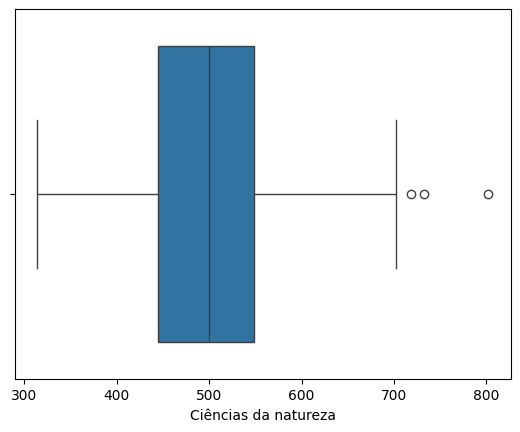

In [192]:
sns.boxplot(df_enem, x = df_enem['Ciências da natureza'], showfliers=True)

In [193]:
Q1_ciencias_natureza = df_enem['Ciências da natureza'].quantile(0.25)
Q3_ciencias_natureza = df_enem['Ciências da natureza'].quantile(0.75)
IQR_ciencias_natureza = Q3_ciencias_natureza - Q1_ciencias_natureza
lower_ciencias_natureza = Q1_ciencias_natureza - 1.5 * IQR_ciencias_natureza
upper_ciencias_natureza = Q3_ciencias_natureza + 1.5 * IQR_ciencias_natureza

outliers_ciencias_natureza = []

for i in df_enem['Ciências da natureza']:
  if((i > upper_ciencias_natureza)or(i < lower_ciencias_natureza)):
        outliers_ciencias_natureza.append(i)

print('Há', len(outliers_ciencias_natureza), 'outliers na disciplina de ciências da natureza, com os respectivos valor: ', outliers_ciencias_natureza)

Há 3 outliers na disciplina de ciências da natureza, com os respectivos valor:  [802.0045683513, 732.5029639878, 718.3960614586]


9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [201]:
df_redacao_sem_outliers = df_enem[(df_enem['Redação'] > lower_redacao) & (df_enem['Redação'] < upper_redacao)]
df_ciencias_sem_outliers = df_enem[(df_enem['Ciências da natureza'] > lower_ciencias_natureza) & (df_enem['Ciências da natureza'] < upper_ciencias_natureza)]

In [219]:
media_ciencias_sem_outliers = df_ciencias_sem_outliers['Ciências da natureza'].mean()
media_ciencias_com_outliers = df_enem['Ciências da natureza'].mean()
media_redacao_sem_outliers = df_redacao_sem_outliers['Redação'].mean()
media_redacao_com_outliers = df_enem['Redação'].mean()

In [220]:
media_nacional_ciencias = (media_ciencias_com_outliers - media_ciencias_sem_outliers) / media_ciencias_com_outliers * 100
media_nacional_redacao = (media_redacao_com_outliers - media_redacao_sem_outliers) / media_redacao_com_outliers * 100

In [221]:
print('A média nacional de ciências da natureza fica em:', media_nacional_ciencias)
print('A média nacional de redação fica em:', media_nacional_redacao)
#não houve alterações significativas

A média nacional de ciências da natureza fica em: 0.18416362304123635
A média nacional de redação fica em: -0.001642846806246439


10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [227]:
def nan_outlier_zscore(dataset, threshold, colname):
    df = dataset[colname]
    outliers = []
    zscore = []
    val = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
      z_score= (i - mean)/std
      zscore.append(z_score)
      if np.abs(z_score) > threshold:
          outliers.append(i)
          val.append(np.nan)
      else:
          val.append(i)
    return val

In [255]:
df_enem.describe().loc[['mean','std']]

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
mean,514.201225,527.296737,498.947796,535.380284,637.794010
std,83.495050,76.767004,78.097065,85.823684,113.029244


In [251]:
#Mediana

def mediana_outliers(dataset, threshold):
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  nan_outlier_zscore(dataset, 3, column)
  return dataset.fillna(dataset.median())

df_enem_outliers_mediana = mediana_outliers(df_enem.select_dtypes(include=np.number), 3)
df_enem_outliers_mediana.describe().loc[['mean','std']]

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
mean,514.238411,527.119026,499.212517,535.205659,637.431125
std,79.029624,74.151030,70.843823,82.407315,104.569901


In [254]:
#Media

def media_outliers(dataset, threshold):
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  nan_outlier_zscore(dataset, 3, column)
  return dataset.fillna(dataset.mean())

df_enem_outliers_media = media_outliers(df_enem.select_dtypes(include=np.number), 3)
df_enem_outliers_media.describe().loc[['mean','std']]

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
mean,514.201225,527.296737,498.947796,535.380284,637.794010
std,79.029549,74.148062,70.841521,82.405126,104.566154


In [253]:
#Moda

def mode_outliers(dataset, threshold):
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  nan_outlier_zscore(dataset, 3, column)
  return dataset.fillna(dataset.mode())

df_enem_outliers_mode = mode_outliers(df_enem.select_dtypes(include=np.number), 3)
df_enem_outliers_mode.describe().loc[['mean','std']]

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
mean,514.201225,526.670443,498.947796,535.380284,637.869704
std,83.495050,76.741783,78.097065,85.823684,112.186345


In [ ]:
#A moda é a medida de tendência central que menos se difere quando os nulos são substituidos por ela